### Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [1]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn as sk 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


/Users/punkymonkey/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1041: UserWarning: Duplicate key in file "/Users/punkymonkey/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


#### Step 2: Examine your data 

In [2]:
airport_cancellations_df = pd.read_csv("airport_cancellations.csv")
airport_cancellations_df = airport_cancellations_df.dropna() 
airport_cancellations_df[:3]

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0


In [3]:
airport_operations_df = pd.read_csv("airport_operations.csv")
airport_operations_df = airport_operations_df.dropna() 
airport_operations_df[:3]

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82


In [4]:
plot_df = airport_cancellations_df[['Departure Cancellations', 'Arrival Cancellations','Departure Diversions',
                                   'Arrival Diversions']]

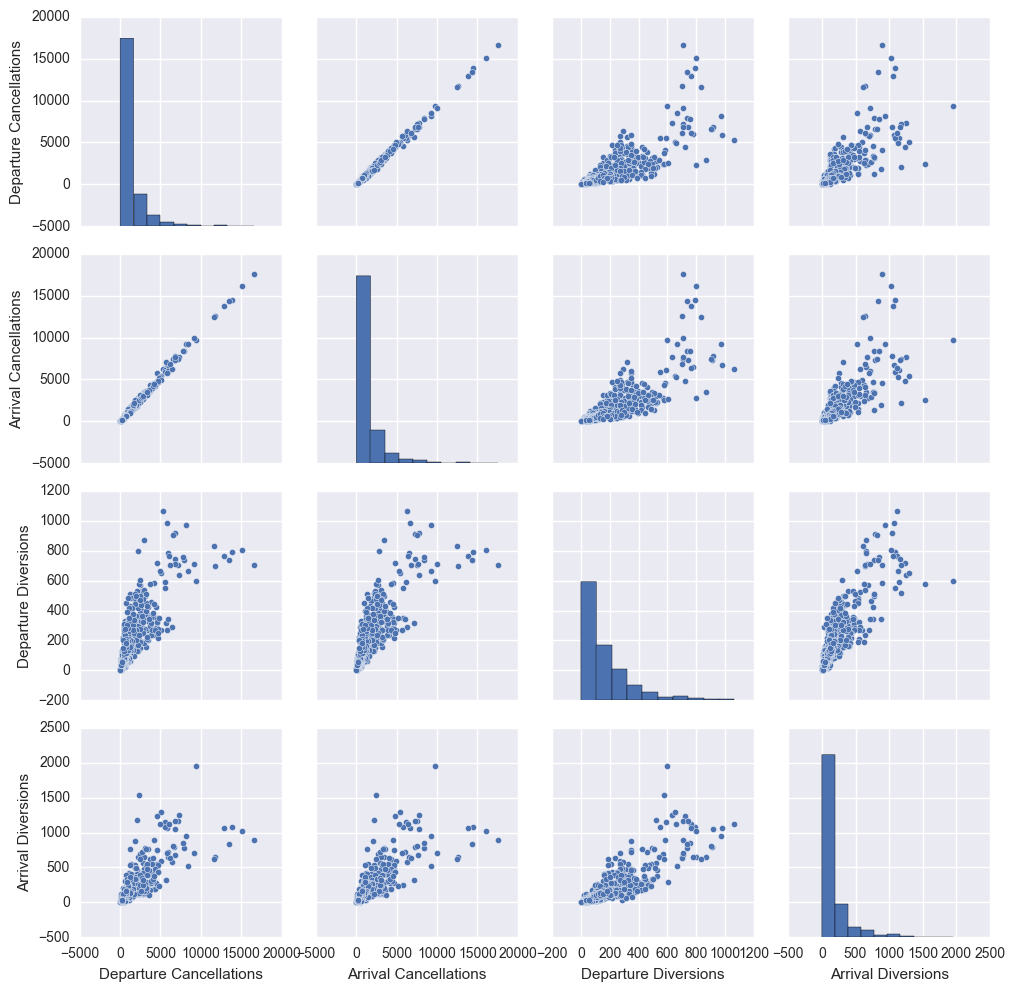

In [5]:
sns.pairplot(plot_df)

### Intro: Write a problem statement / aim for this project

We want to understand the behavior of flight cancellations
Answer: How are we going to do this?

### Part 1: Create a SQLite database 

#### 1. Let's create a database where we can house our airport data

In [6]:
import pandas as pd
from pandas.io import sql

import sqlite3
sqlite_db = 'AirportDatabase.sqlite'
conn = sqlite3.connect(sqlite_db)



Load our csv files into tables

In [7]:
pd.read_csv('airport_cancellations.csv').to_sql('airport_cancellations',con=conn,if_exists='replace',index=False)

/Users/punkymonkey/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1165: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [8]:
pd.read_csv('airport_operations.csv').to_sql('airport_operation',con=conn,if_exists='replace',index=False)

Join airport_cancellations.csv and airports.csv into one table (try to do it with both pandas and SQLite)

In [9]:
airport_df = pd.read_csv('airports.csv')

In [10]:
airport_df.columns

Index([u'Key', u'LocID', u'AP_NAME', u'ALIAS', u'Facility Type', u'FAA REGION',
       u'COUNTY', u'CITY', u'STATE', u'AP Type', u'Latitude', u'Longitude',
       u'Boundary Data Available'],
      dtype='object')

In [11]:
airport_df['FAA REGION'].unique()

array(['ASO', 'AWP', 'ASW', 'ACE', 'AEA', 'ANM', 'AGL', 'ANE', 'AAL', nan], dtype=object)

In [12]:
#IT APPEARS THE ALIAS COLUMNS HAS MANY DIFFERENT WEIRD THINGS IN THEM LETS GET RID OF THEM 

In [13]:
#CLEANING UP AIRPORTS TABLE/DATAFRAME 

In [14]:
airport_df.ALIAS[3]

'Aeropuerto Antonio Rivera Rodr\xef\xbf\xbdguez'

In [15]:
def conv_to_urf(a):
    return str(a).decode('utf-8')

In [16]:
airport_df['ALIAS'] = airport_df['ALIAS'].apply(conv_to_urf)

In [17]:
airport = airport_df.dropna()

In [18]:
#NOW LETS ADD AIRPORT_DF TO THE DATABASE 

In [19]:
airport.to_sql('airport', con=conn, if_exists='replace', index=False)

Join airport_cancellations.csv and airports.csv into one table (try to do it with both pandas and SQLite)

In [20]:
# LocID in airports.csv 
# is the same as Airport in airport_cancellations.csv
# so these are what you would join on ...

joined_df = pd.merge(airport_cancellations_df,airport_operations_df,
                      left_on = 'Airport', right_on = 'airport')

#ALSO, I AM MERGING THE AIRPORT DATAFRAMA WITH THE JOINED_DF DATAFRAME 



joined_df = pd.merge(joined_df, airport_df, left_on='Airport', right_on='LocID')

In [21]:
joined_df.dropna(inplace=True)

In [22]:
Cancellation_df = joined_df[['Departure Cancellations','Arrival Cancellations',
                             'Departure Diversions','Arrival Diversions']]

In [23]:
joined_df.drop(['airport','year','Departure Cancellations','Arrival Cancellations',
                             'Departure Diversions','Arrival Diversions'], axis=1, inplace=True)

Query the database for our intial data

In [24]:
# cur = conn.cursor()
# cur.execute("""SELECT * FROM Airport""")
# ap = cur.fetchall()
# print ap

#### 1.2 What are the risks and assumptions of our data? 

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [25]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8789 entries, 0 to 8788
Data columns (total 28 columns):
Airport                               8789 non-null object
Year                                  8789 non-null float64
departures for metric computation     8789 non-null int64
arrivals for metric computation       8789 non-null int64
percent on-time gate departures       8789 non-null float64
percent on-time airport departures    8789 non-null float64
percent on-time gate arrivals         8789 non-null float64
average_gate_departure_delay          8789 non-null float64
average_taxi_out_time                 8789 non-null float64
average taxi out delay                8789 non-null float64
average airport departure delay       8789 non-null float64
average airborne delay                8789 non-null float64
average taxi in delay                 8789 non-null float64
average block delay                   8789 non-null float64
average gate arrival delay            8789 non-null float6

In [26]:
joined_df.describe()

,Year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Key,Latitude,Longitude
count,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,2008.986233,113462.406531,112995.271248,0.778950,0.726757,0.766806,12.898230,13.873027,3.680732,15.712726,2.876105,1.413830,3.290090,13.436961,1714.484355,36.448807,-94.899998
std,3.156287,98013.586104,97659.402573,0.051989,0.075708,0.050351,3.020389,3.804768,2.338027,4.348108,1.168646,0.854782,0.987058,3.244237,1004.487202,6.682976,20.633247
min,2004.000000,360.000000,486.000000,0.529900,0.380800,0.513600,5.350000,7.040000,0.100000,6.290000,0.950000,0.000000,1.230000,6.330000,246.000000,18.439295,-157.922429
25%,2006.000000,41845.000000,41844.000000,0.753000,0.691800,0.742200,10.840000,11.470000,2.300000,12.890000,2.040000,0.840000,2.620000,11.270000,770.000000,32.896828,-111.977773
50%,2009.000000,79489.000000,79750.000000,0.783800,0.740200,0.770500,12.540000,12.940000,3.050000,15.100000,2.620000,1.140000,3.130000,12.970000,1531.000000,37.618972,-87.897068
75%,2012.000000,166479.000000,165955.000000,0.810700,0.773500,0.797600,14.620000,15.750000,4.230000,17.560000,3.560000,1.780000,3.800000,14.940000,2502.000000,40.795250,-80.152741
max,2014.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,25.840000,35.760000,18.940000,40.510000,7.820000,6.180000,7.520000,27.780000,3575.000000,61.174083,-66.002004


In [27]:
joined_df.columns

Index([u'Airport', u'Year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay', u'Key', u'LocID',
       u'AP_NAME', u'ALIAS', u'Facility Type', u'FAA REGION', u'COUNTY',
       u'CITY', u'STATE', u'AP Type', u'Latitude', u'Longitude',
       u'Boundary Data Available'],
      dtype='object')

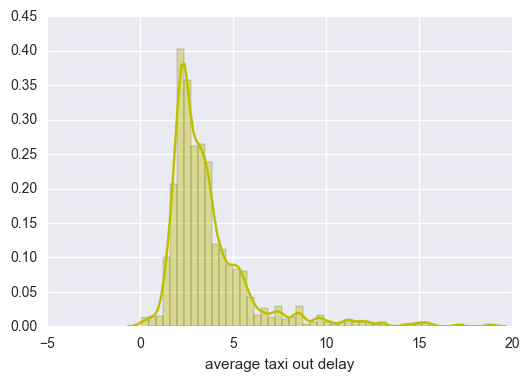

In [28]:
sns.distplot(joined_df['average taxi out delay'], hist=True, color="y")

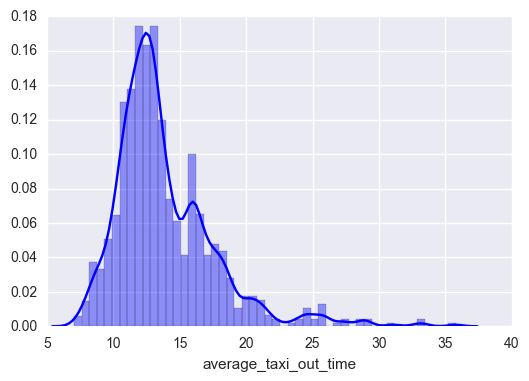

In [29]:
sns.distplot(joined_df['average_taxi_out_time'], hist=True, color="b")

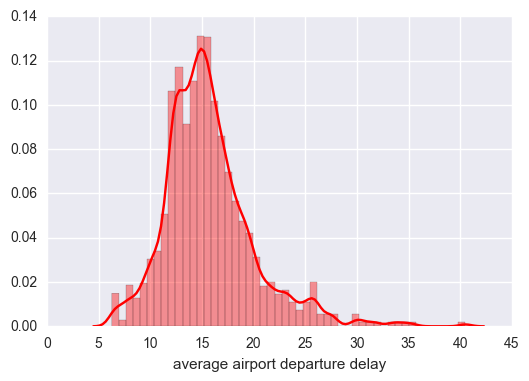

In [30]:
sns.distplot(joined_df['average airport departure delay'], hist=True, color="r")

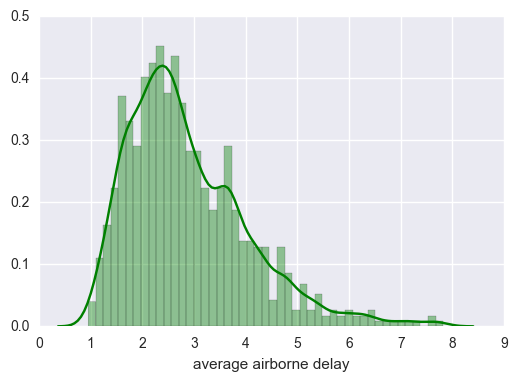

In [31]:
sns.distplot(joined_df['average airborne delay'], hist=True, color="g")

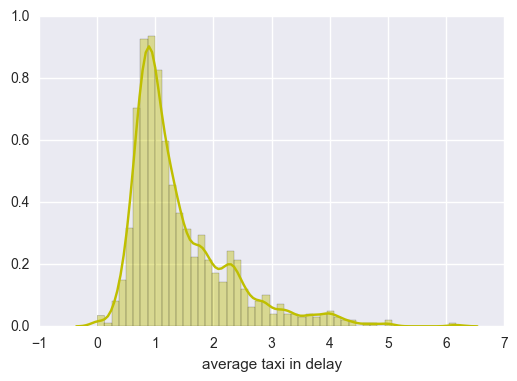

In [32]:
sns.distplot(joined_df['average taxi in delay'], hist=True, color="y")

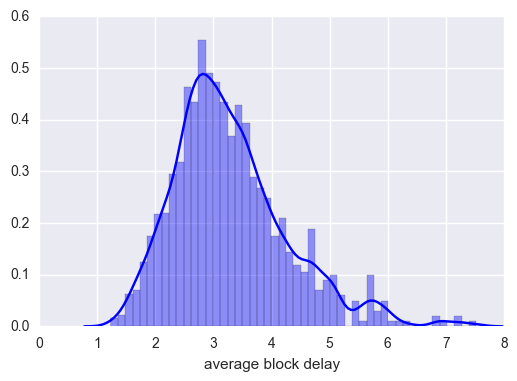

In [33]:
sns.distplot(joined_df['average block delay'], hist=True, color="b")

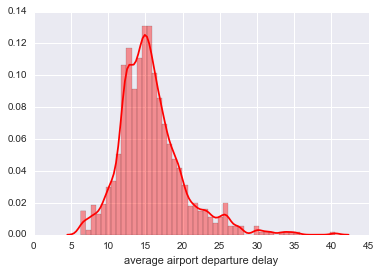

In [34]:
sns.distplot(joined_df['average airport departure delay'], hist=True, color="r")

Here we see the features and how they are distruted based on their histograms

#### Are there any unique values? 

In [35]:
joined_df['Airport'].unique()

array(['ABQ', 'ANC', 'ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BUF',
       'BUR', 'BWI', 'CLE', 'CLT', 'CVG', 'DAL', 'DAY', 'DCA', 'DEN',
       'DFW', 'DTW', 'EWR', 'FLL', 'HNL', 'HOU', 'HPN', 'IAD', 'IAH',
       'IND', 'ISP', 'JAX', 'JFK', 'LAS', 'LAX', 'LGA', 'LGB', 'MCI',
       'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSP', 'MSY', 'OAK',
       'OGG', 'OMA', 'ONT', 'ORD', 'OXR', 'PBI', 'PDX', 'PHL', 'PHX',
       'PIT', 'PSP', 'PVD', 'RDU', 'RFD', 'RSW', 'SAN', 'SAT', 'SDF',
       'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA', 'STL', 'SWF',
       'TPA', 'TUS'], dtype=object)

In [36]:
joined_df['Airport'].nunique()

74

In [37]:
joined_df['FAA REGION'].unique()

array(['ASW', 'AAL', 'ASO', 'ANE', 'AEA', 'AWP', 'AGL', 'ANM', 'ACE'], dtype=object)

### Part 3: Data Mining

#### 3.1 Create Dummy Variables

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
joined_df['FAA REGION'] = LabelEncoder().fit_transform(joined_df['FAA REGION'])
joined_df['Year'] = LabelEncoder().fit_transform(joined_df['Year'])

In [36]:
feature_list = ['departures for metric computation',
                'arrivals for metric computation',
                'percent on-time gate arrivals',
                'percent on-time airport departures',
                'percent on-time gate departures',
                'percent '
                'average_gate_departure_delay',
                'average_taxi_out_time',
                'average airborne delay',
                'average taxi in delay',
                'average block delay',
                'average gate arrival delay',
                'average airport departure delay',
                'Year',
                'FAA REGION'
               ]

In [37]:
airport_grouped = joined_df.drop(['Key','Latitude','Longitude'],axis=1).pivot_table(feature_list, index=['Airport'], 
                                                                                     aggfunc=np.mean)


In [38]:
joined_df['FAA REGION']

0       7
1       7
2       7
3       7
4       7
5       7
6       7
7       7
8       7
9       7
10      7
11      7
12      7
13      7
14      7
15      7
16      7
17      7
18      7
19      7
20      7
21      7
22      7
23      7
24      7
25      7
26      7
27      7
28      7
29      7
       ..
8759    8
8760    8
8761    8
8762    8
8763    8
8764    8
8765    8
8766    8
8767    8
8768    8
8769    8
8770    8
8771    8
8772    8
8773    8
8774    8
8775    8
8776    8
8777    8
8778    8
8779    8
8780    8
8781    8
8782    8
8783    8
8784    8
8785    8
8786    8
8787    8
8788    8
Name: FAA REGION, dtype: int64

In [42]:
airport_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, ABQ to TUS
Data columns (total 13 columns):
FAA REGION                            74 non-null float64
Year                                  74 non-null float64
arrivals for metric computation       74 non-null float64
average airborne delay                74 non-null float64
average airport departure delay       74 non-null float64
average block delay                   74 non-null float64
average gate arrival delay            74 non-null float64
average taxi in delay                 74 non-null float64
average_taxi_out_time                 74 non-null float64
departures for metric computation     74 non-null float64
percent on-time airport departures    74 non-null float64
percent on-time gate arrivals         74 non-null float64
percent on-time gate departures       74 non-null float64
dtypes: float64(13)
memory usage: 8.1+ KB


#### 3.2 Format and Clean the Data

In [43]:
#STANDARDIZE/ NORMALIZE THE DATA BEFORE PROCEEDING 

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

In [44]:
#Airport_clean_Data.plot(kind='hist',stacked=False)

#### 4.2 Find correlations in the data

In [45]:
airport_grouped.corr()

,FAA REGION,Year,arrivals for metric computation,average airborne delay,average airport departure delay,average block delay,average gate arrival delay,average taxi in delay,average_taxi_out_time,departures for metric computation,percent on-time airport departures,percent on-time gate arrivals,percent on-time gate departures
FAA REGION,1.000000,-0.162208,-0.050973,-0.514199,-0.479612,-0.343853,-0.496506,-0.031753,-0.307878,-0.052307,0.388093,0.360879,0.302900
Year,-0.162208,1.000000,0.098014,0.127176,0.195366,0.165563,0.134110,0.089439,0.095709,0.098108,-0.172395,-0.142598,-0.188941
arrivals for metric computation,-0.050973,0.098014,1.000000,0.449196,0.442130,0.425136,0.119027,0.907556,0.658976,0.999912,-0.438513,0.133266,-0.070719
average airborne delay,-0.514199,0.127176,0.449196,1.000000,0.684100,0.539286,0.459688,0.444552,0.709142,0.450347,-0.677491,-0.272105,-0.331549
average airport departure delay,-0.479612,0.195366,0.442130,0.684100,1.000000,0.629922,0.834090,0.543865,0.736742,0.443657,-0.956902,-0.686489,-0.737600
average block delay,-0.343853,0.165563,0.425136,0.539286,0.629922,1.000000,0.645255,0.507312,0.676789,0.428616,-0.576380,-0.463724,-0.342425
average gate arrival delay,-0.496506,0.134110,0.119027,0.459688,0.834090,0.645255,1.000000,0.253202,0.480302,0.120514,-0.745386,-0.913153,-0.692799
average taxi in delay,-0.031753,0.089439,0.907556,0.444552,0.543865,0.507312,0.253202,1.000000,0.727164,0.908468,-0.522638,-0.009820,-0.150415
average_taxi_out_time,-0.307878,0.095709,0.658976,0.709142,0.736742,0.676789,0.480302,0.727164,1.000000,0.661041,-0.690061,-0.224834,-0.184043
departures for metric computation,-0.052307,0.098108,0.999912,0.450347,0.443657,0.428616,0.120514,0.908468,0.661041,1.000000,-0.439424,0.132875,-0.071428


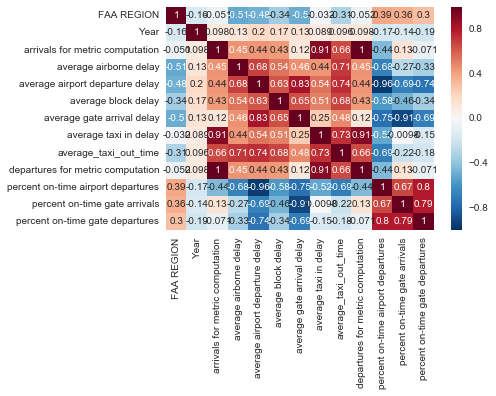

In [46]:
sns.heatmap(airport_grouped.corr(),annot=True) 

#### 4.3 What is the value of understanding correlations before PCA? 

Answer: 

#### 4.4 Validate your findings using statistical analysis

In [47]:
#TRY CLUSTERING THE NEW DATA 

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
y = airport_grouped['FAA REGION']

In [50]:
airport_grouped.Year = LabelEncoder().fit_transform(airport_grouped.Year)

In [51]:
airport_grouped.drop(['FAA REGION'], axis=1, inplace=True)

In [52]:
#X = airport_grouped.values
X = pd.DataFrame(StandardScaler().fit_transform(airport_grouped), index=airport_grouped.index, 
                 columns=airport_grouped.columns)

#### 4.5 How can you improve your overall analysis? 

Answer: 

### Part 5: Perform a PCA and Present Findings

#### 5.1 Conduct the PCA

In [53]:
from sklearn.decomposition import PCA

In [54]:
X.shape

(74, 12)

In [55]:
cov_mat = np.cov(X.T)
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

In [56]:
print eigenValues

[  6.33418431e+00   2.84905506e+00   1.02245447e+00   7.29566699e-01
   5.89513465e-01   2.68223057e-01   1.90464292e-01   9.32026385e-02
   5.70822316e-02   2.21931880e-02   8.37377081e-03   7.03788667e-05]


In [57]:
print eigenVectors

[[  4.06055145e-02   9.24990458e-02   9.54994475e-01  -2.38172828e-01
   -1.77668094e-02  -1.12438035e-01   8.43228013e-02  -2.54920778e-02
    6.22124730e-03   1.37426753e-02   1.04238240e-02  -5.07198884e-05]
 [  2.58112859e-01  -4.23761866e-01   9.40006569e-02   2.41943607e-01
   -7.54470111e-02   1.34266683e-01   2.24101749e-01   3.31641866e-01
    7.08898835e-02  -8.33104567e-03  -3.89670614e-02   7.04194485e-01]
 [  2.96826212e-01  -5.18045202e-02  -1.00391970e-01  -4.33479640e-01
    6.35004970e-01   3.55493641e-01   3.58299823e-01  -2.09903556e-01
    7.84239454e-02   5.29647164e-02  -1.50344394e-02  -6.55358341e-04]
 [  3.77945350e-01   1.33436936e-01  -1.97849605e-02   6.52608780e-02
    1.44338582e-01  -2.47789530e-01  -7.30392636e-02   8.02615837e-02
   -6.09551810e-01  -1.60228563e-02  -6.07351735e-01  -2.29474559e-03]
 [  3.04537785e-01   7.07484357e-03  -4.72034009e-02  -4.67309182e-01
   -5.40728873e-01   5.11163432e-01  -3.34991007e-01   2.46048475e-02
   -8.25120907e-

In [58]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

6.33418430902
2.84905506167
1.02245447095
0.729566698523
0.589513464948
0.268223057092
0.190464291634
0.0932026384994
0.0570822316029
0.0221931880278
0.00837377081056
7.03788666644e-05


In [59]:
cov_mat

array([[ 1.01369863,  0.00402772,  0.02891221,  0.10603825,  0.10004734,
         0.05990512, -0.0139879 , -0.010056  ,  0.00408059, -0.13956998,
        -0.10373906, -0.19151543],
       [ 0.00402772,  1.01369863,  0.45534922,  0.44818682,  0.43096026,
         0.12065728,  0.91998831,  0.66800297,  1.01360955, -0.44451988,
         0.1350912 , -0.07168771],
       [ 0.02891221,  0.45534922,  1.01369863,  0.69347155,  0.54667305,
         0.46598473,  0.45064156,  0.71885594,  0.45651581, -0.68677167,
        -0.27583207, -0.33609067],
       [ 0.10603825,  0.44818682,  0.69347155,  1.01369863,  0.63855082,
         0.84551553,  0.55131554,  0.74683455,  0.44973445, -0.97001054,
        -0.69589298, -0.74770381],
       [ 0.10004734,  0.43096026,  0.54667305,  0.63855082,  1.01369863,
         0.65409438,  0.51426137,  0.68605975,  0.43448747, -0.58427519,
        -0.47007622, -0.34711555],
       [ 0.05990512,  0.12065728,  0.46598473,  0.84551553,  0.65409438,
         1.01369863,  

In [60]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [61]:
X_pca.shape

(74, 2)

In [62]:
pca.components_

array([[ 0.04060551,  0.25811286,  0.29682621,  0.37794535,  0.30453778,
         0.30617221,  0.28829982,  0.33260351,  0.25875158, -0.3689787 ,
        -0.23229582, -0.2519819 ],
       [ 0.09249905, -0.42376187, -0.05180452,  0.13343694,  0.00707484,
         0.31882408, -0.35530802, -0.18654024, -0.4235872 , -0.13665767,
        -0.45277299, -0.35431056]])

In [63]:
pca.explained_variance_ratio_

array([ 0.5207156 ,  0.23421286])

In [64]:
df_plot = pd.DataFrame(X_pca, index=airport_grouped.index, columns=['PC1','PC2'])

In [65]:
df_plot

,PC1,PC2
Airport,,
ABQ,-2.554774,0.177234
ANC,0.188585,0.727654
ATL,4.836584,-3.954600
AUS,-1.389544,0.768414
BDL,-1.093331,0.556845
BHM,-1.042222,1.732180
BNA,-1.023905,0.581833
BOS,2.121247,-0.662258
BUF,-0.160833,1.690837


In [66]:
components = pca.components_

In [67]:
print airport_grouped.columns, '\n'

for i, pc in enumerate(['PC1','PC2']):
    print pc, 'weighting vector:', components[i]
    print '-------------------------------------\n'


Index([u'Year', u'arrivals for metric computation', u'average airborne delay',
       u'average airport departure delay', u'average block delay',
       u'average gate arrival delay', u'average taxi in delay',
       u'average_taxi_out_time', u'departures for metric computation',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'percent on-time gate departures'],
      dtype='object') 

PC1 weighting vector: [ 0.04060551  0.25811286  0.29682621  0.37794535  0.30453778  0.30617221
  0.28829982  0.33260351  0.25875158 -0.3689787  -0.23229582 -0.2519819 ]
-------------------------------------

PC2 weighting vector: [ 0.09249905 -0.42376187 -0.05180452  0.13343694  0.00707484  0.31882408
 -0.35530802 -0.18654024 -0.4235872  -0.13665767 -0.45277299 -0.35431056]
-------------------------------------



In [68]:
pca_loadings = pd.DataFrame(components.T, index=airport_grouped.columns, 
                            columns=['V1','V2'])
pca_loadings

,V1,V2
Year,0.040606,0.092499
arrivals for metric computation,0.258113,-0.423762
average airborne delay,0.296826,-0.051805
average airport departure delay,0.377945,0.133437
average block delay,0.304538,0.007075
average gate arrival delay,0.306172,0.318824
average taxi in delay,0.288300,-0.355308
average_taxi_out_time,0.332604,-0.186540
departures for metric computation,0.258752,-0.423587
percent on-time airport departures,-0.368979,-0.136658


In [69]:
#plt.scatter(X_pca[:,0], X_pca[:,1], c=pca.components_)

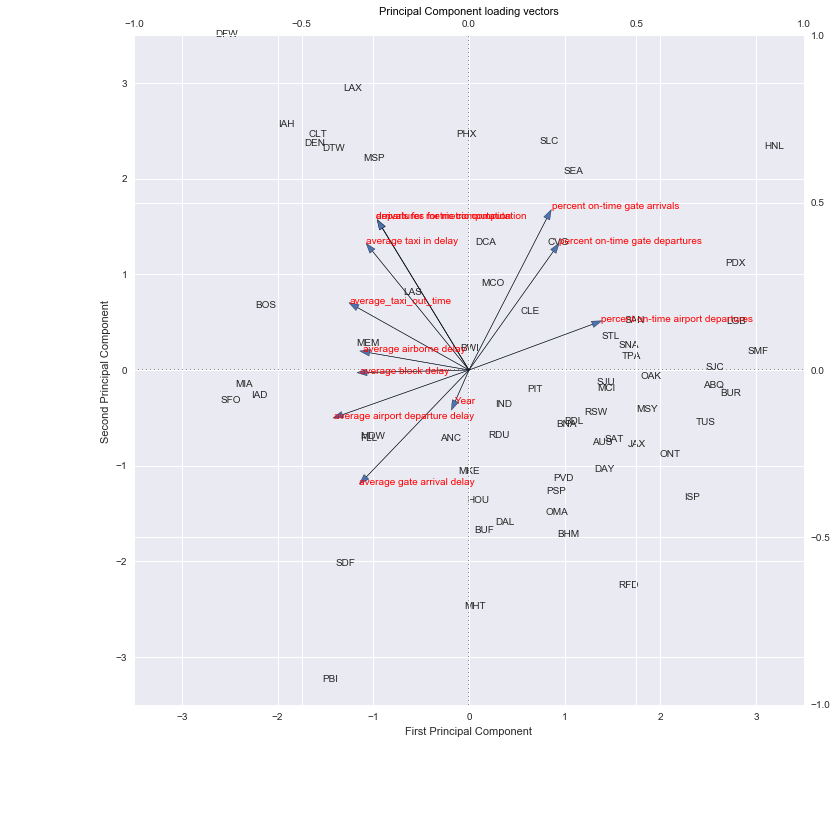

In [70]:
fig , ax1 = plt.subplots(figsize=(12,12))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='red')
ax2.set_xlabel('Principal Component loading vectors', color='black')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])
ax2.arrow(0,0,-pca_loadings.V1[4], -pca_loadings.V2[4])
ax2.arrow(0,0,-pca_loadings.V1[5], -pca_loadings.V2[5])
ax2.arrow(0,0,-pca_loadings.V1[6], -pca_loadings.V2[6])
ax2.arrow(0,0,-pca_loadings.V1[7], -pca_loadings.V2[7])
ax2.arrow(0,0,-pca_loadings.V1[8], -pca_loadings.V2[8])
ax2.arrow(0,0,-pca_loadings.V1[9], -pca_loadings.V2[9])
ax2.arrow(0,0,-pca_loadings.V1[10], -pca_loadings.V2[10])
ax2.arrow(0,0,-pca_loadings.V1[11], -pca_loadings.V2[11])

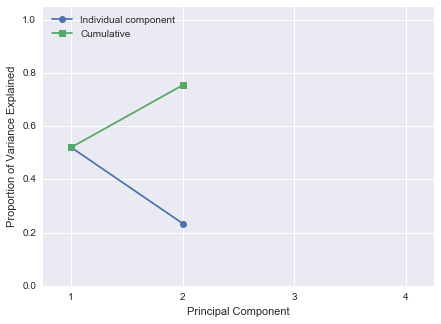

In [71]:
#SCREE PLOT LOOK AT LATER 

plt.figure(figsize=(7,5))

plt.plot([1,2], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

In [72]:
print components

[[ 0.04060551  0.25811286  0.29682621  0.37794535  0.30453778  0.30617221
   0.28829982  0.33260351  0.25875158 -0.3689787  -0.23229582 -0.2519819 ]
 [ 0.09249905 -0.42376187 -0.05180452  0.13343694  0.00707484  0.31882408
  -0.35530802 -0.18654024 -0.4235872  -0.13665767 -0.45277299 -0.35431056]]


In [73]:
pca_component_df = pd.DataFrame(components,columns=airport_grouped.columns)

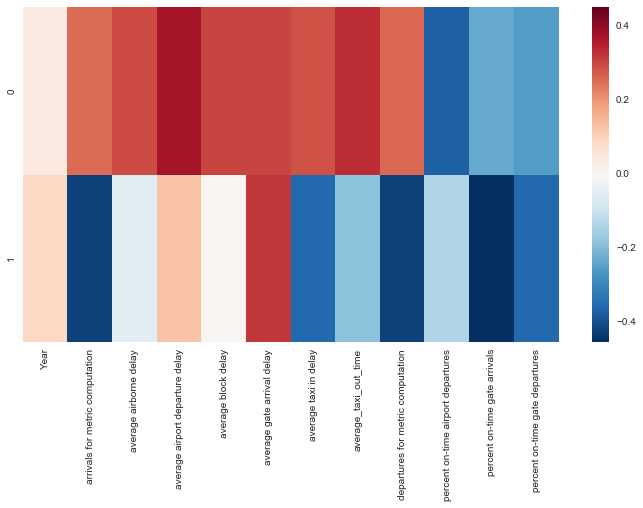

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(pca_component_df)

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for kval in range(2,20,1):
    kmeans = KMeans(n_clusters=kval)
    kmeans.fit(X_pca)
    scl_score = silhouette_score(X_pca, kmeans.labels_)
    print 'k:' , kval, 'silhouette_score', scl_score

k: 2 silhouette_score 0.493945490287
k: 3 silhouette_score 0.394698974102
k: 4 silhouette_score 0.367608775278
k: 5 silhouette_score 0.346957897724
k: 6 silhouette_score 0.35758053739
k: 7 silhouette_score 0.334451386659
k: 8 silhouette_score 0.397586277501
k: 9 silhouette_score 0.407665174432
k: 10 silhouette_score 0.418259894059
k: 11 silhouette_score 0.415815971534
k: 12 silhouette_score 0.411388229356
k: 13 silhouette_score 0.393696403941
k: 14 silhouette_score 0.394806172609
k: 15 silhouette_score 0.372378994891
k: 16 silhouette_score 0.382216797701
k: 17 silhouette_score 0.393012123014
k: 18 silhouette_score 0.367599126931
k: 19 silhouette_score 0.404933727134


In [76]:
for kval in range(2,20,1):
    kmeans = KMeans(n_clusters=kval)
    kmeans.fit(X_pca)
    print '---------K:', kval
    print pd.DataFrame(kmeans.labels_, columns=['clst'])['clst'].value_counts()
    print '----------'

---------K: 2
0    56
1    18
Name: clst, dtype: int64
----------
---------K: 3
1    50
2    18
0     6
Name: clst, dtype: int64
----------
---------K: 4
2    34
0    24
3    11
1     5
Name: clst, dtype: int64
----------
---------K: 5
3    24
0    24
2    17
1     6
4     3
Name: clst, dtype: int64
----------
---------K: 6
0    27
3    17
1    11
4    10
2     6
5     3
Name: clst, dtype: int64
----------
---------K: 7
2    26
3    15
0     9
6     8
4     7
1     6
5     3
Name: clst, dtype: int64
----------
---------K: 8
2    25
0    15
6     9
1     8
4     7
3     5
5     4
7     1
Name: clst, dtype: int64
----------
---------K: 9
0    20
5    17
6     9
1     8
8     7
7     4
3     4
4     3
2     2
Name: clst, dtype: int64
----------
---------K: 10
0    20
3    17
9     9
7     7
2     7
5     4
1     4
6     3
8     2
4     1
Name: clst, dtype: int64
----------
---------K: 11
7     18
0     12
1      9
6      7
4      7
3      7
9      4
2      4
10     3
8      2
5      1
Nam

In [77]:
pd.DataFrame(kmeans.labels_, columns=['clst'])['clst'].value_counts()

15    8
1     7
12    6
6     6
9     5
4     5
0     5
13    5
16    5
11    4
10    4
3     3
7     2
5     2
14    2
2     2
17    1
8     1
18    1
Name: clst, dtype: int64

In [78]:
kmeans9 = KMeans(n_clusters=9)

In [79]:
kmeans9.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

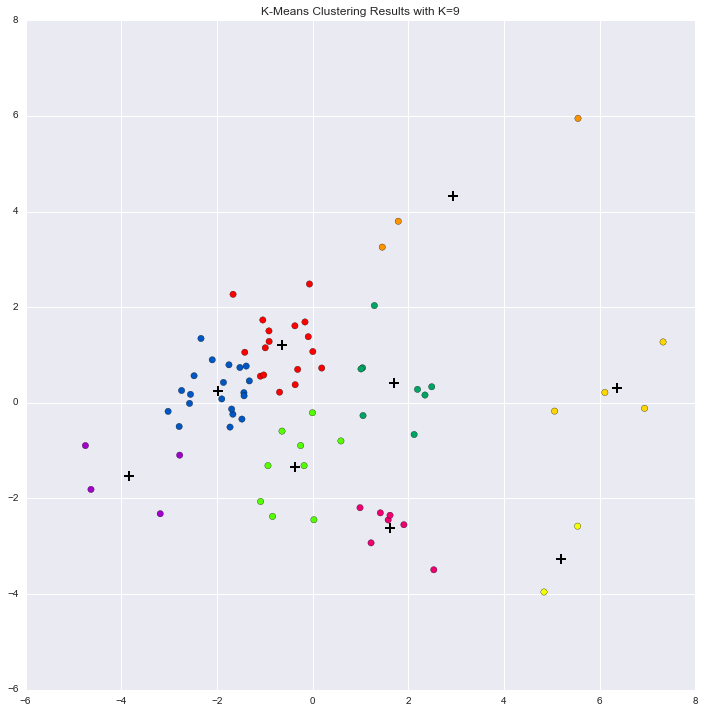

In [80]:
fig, (ax1) = plt.subplots(1, figsize=(12,12))

ax1.scatter(X_pca[:,0], X_pca[:,1], s=40, c=kmeans9.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=9')
ax1.scatter(kmeans9.cluster_centers_[:,0], kmeans9.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)


In [81]:
faa_region = pd.DataFrame(y)

In [82]:
airport_pca = faa_region.join(df_plot, on=None, how='left')

In [83]:
airport_pca.sort('FAA REGION')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,FAA REGION,PC1,PC2
Airport,,,
ANC,0.0,0.188585,0.727654
MCI,1.0,-1.437936,0.212991
OMA,1.0,-0.914150,1.503919
STL,1.0,-1.479381,-0.339757
LGA,2.0,6.109063,0.216410
JFK,2.0,6.938984,-0.115043
ISP,2.0,-2.335323,1.345642
IAD,2.0,2.191618,0.281486
EWR,2.0,7.326145,1.272416


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print clf.score(X_test, y_test), "mean accuracy, using {0} dimensions.".format(X.shape[1])

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.28 mean accuracy, using 12 dimensions.


In [85]:

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=1)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print clf.score(X_test, y_test), "mean accuracy, using {0} principal component dimensions.".format(X_pca.shape[1])

0.2 mean accuracy, using 2 principal component dimensions.


In [86]:
y_pred = clf.predict(X_test)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
print classification_report(y_pred, y_test)

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         1
        2.0       0.33      0.33      0.33         3
        3.0       0.00      0.00      0.00         1
        4.0       0.00      0.00      0.00         0
        6.0       0.00      0.00      0.00         8
        7.0       0.00      0.00      0.00         4
        8.0       0.57      0.50      0.53         8

avg / total       0.22      0.20      0.21        25



//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### 5.2 Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps